<a href="https://colab.research.google.com/github/borgesjose/Data-Science/blob/master/Aula_02_Quarentena_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise da base de dados de filmes do Movie Lens.




## Introdução a analise de dados

### 1. Importando os Dados:

In [0]:
import pandas as pd #Importando a biblioteca a ser utilizada

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### 2. Analisando os Dados

In [4]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [5]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [6]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [7]:
avaliacoes["nota"].mean()

3.501556983616962

In [8]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

In [9]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [10]:
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [11]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [12]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


Plotando os dados:

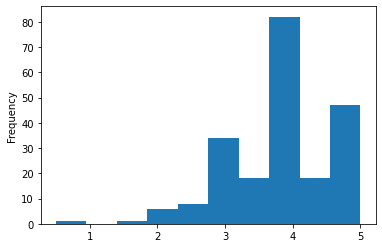

In [13]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

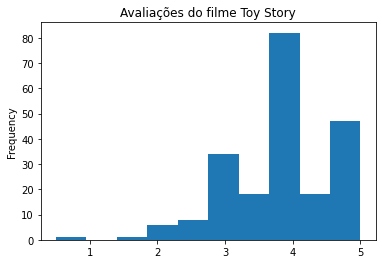

In [14]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist',title="Avaliações do filme Toy Story")

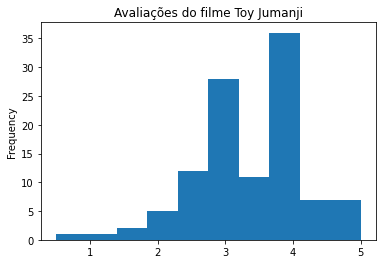

In [15]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',title="Avaliações do filme Toy Jumanji")

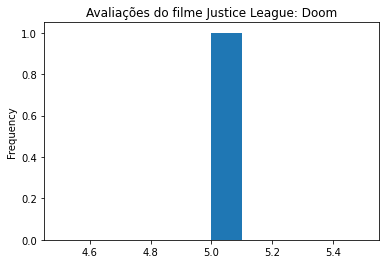

In [16]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',title="Avaliações do filme Justice League: Doom")

### 3. Desafios:


#### 3.1 Determine quantos filmes não tem avaliações e quais são esses filmes.

O numero de filmes é:

In [17]:
filmes_com_media.isnull().sum().sum()

18

Os filmes são:

In [18]:
filmes_sem_nota = filmes_com_media[filmes_com_media["nota"].isnull()]["titulo"]
filmes_sem_nota

816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: titulo, dtype: object

#### 3.2 Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [19]:
filmes_com_media.rename(columns={'nota': 'nota_media'}, inplace=True)
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


#### 3.3 Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
numero_de_votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count()

In [21]:
filmes_com_media_e_numero_de_votos = filmes_com_media.join(numero_de_votos_por_filme, on="filmeId")
filmes_com_media_e_numero_de_votos.rename(columns={'nota':'numero_de_votos'}, inplace=True)
filmes_com_media_e_numero_de_votos.head()

,filmeId,titulo,generos,nota_media,numero_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


#### 3.4 Arredondar as médias (coluna de nota média) para duas casas decimais.

In [22]:
filmes_com_media_e_numero_de_votos.nota_media = filmes_com_media_e_numero_de_votos.nota_media.round(2)
filmes_com_media_e_numero_de_votos.head()

,filmeId,titulo,generos,nota_media,numero_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


#### 3.5 Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [23]:
filmes_com_media_e_numero_de_votos["generos"]

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: generos, Length: 9742, dtype: object

In [0]:
todos_os_generos = []
for x in filmes_com_media_e_numero_de_votos["generos"].str.split(pat = "|"):
    todos_os_generos.extend(x)
generos = set(todos_os_generos)

Logo os generos utilizados para avaliação são:

In [25]:
generos

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

#### 3.6 Contar o número de aparições de cada genero.

In [0]:
serie_generos = pd.Series(todos_os_generos)

In [0]:
list = []
for x in generos:
  cont = 0;
  for y in serie_generos:
    if y == x:
      cont+=1
  list.append((x,cont))
numero_de_aparicoes_genero = pd.Series(dict(list))

Então temos:

In [28]:
numero_de_aparicoes_genero.sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

#### 3.7 Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

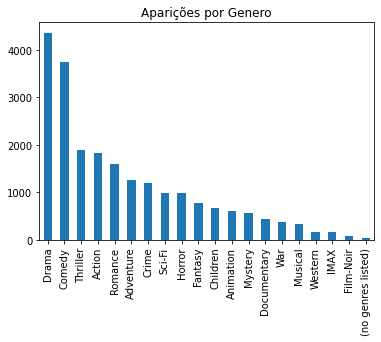

In [29]:
numero_de_aparicoes_genero.sort_values(ascending=False).plot(kind='bar',title="Aparições por Genero")

## Técnicas de Centralidade e Visualização de Dados

In [30]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
filmes["generos"].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
filmes["generos"].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [33]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

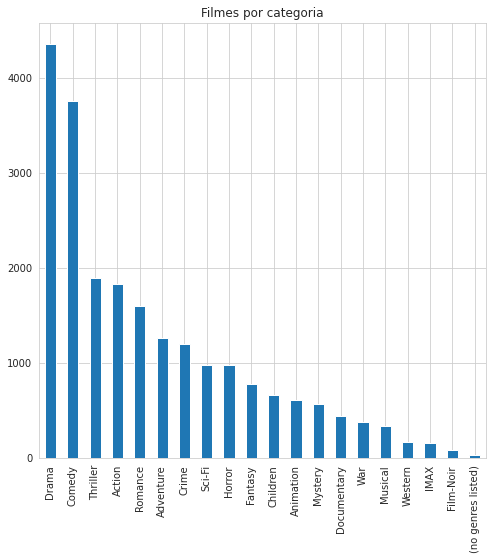

In [41]:
import matplotlib.pyplot as plt
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

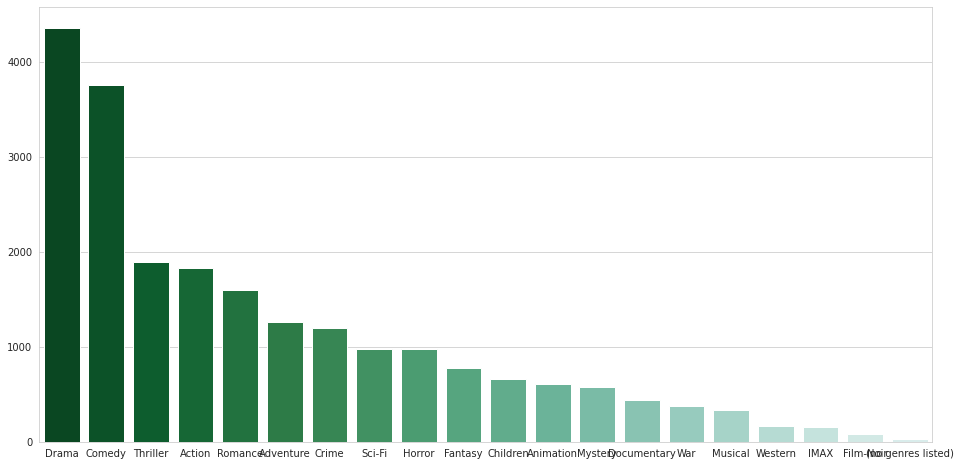

In [42]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

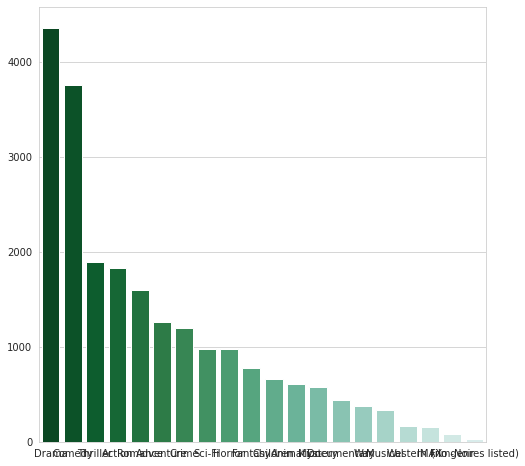

In [43]:
import seaborn as sns

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

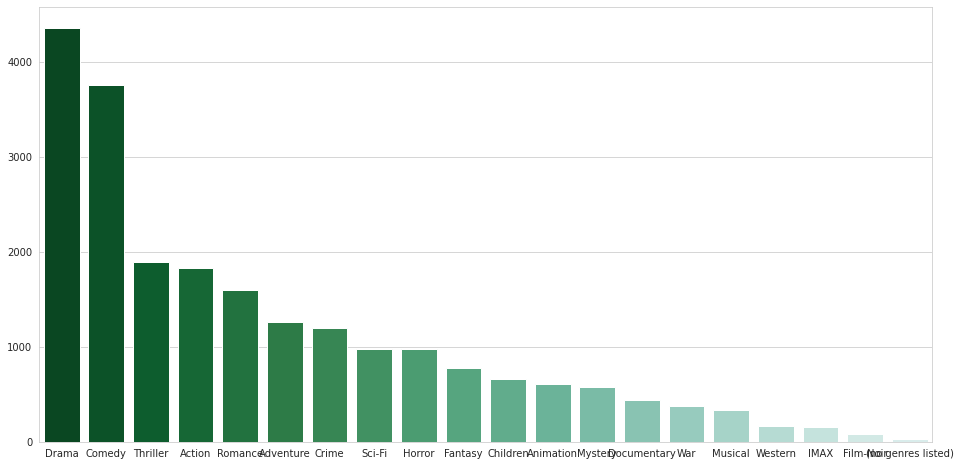

In [44]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

3.9209302325581397


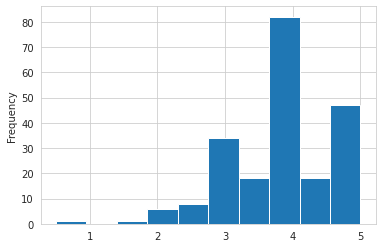

In [45]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


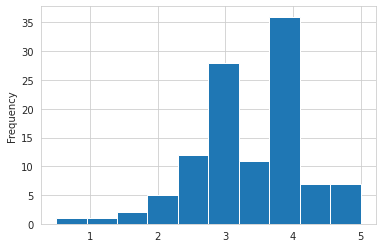

In [46]:
notas_do_filme_1 = avaliacoes.query("filmeId==2")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

In [48]:
filmes_com_media


,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [49]:
filmes_com_media.sort_values("nota_media", ascending=False)[2450:2500]

,filmeId,titulo,generos,nota_media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

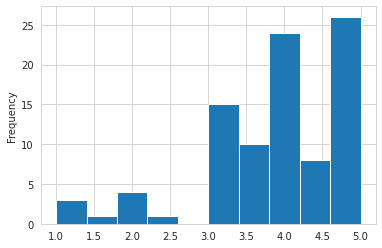

In [51]:
#Mágico de Oz
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

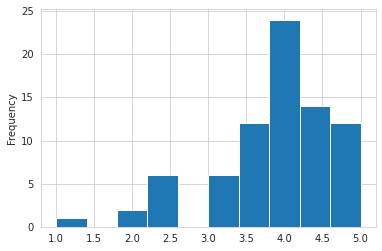

In [52]:
plot_filme(46578)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

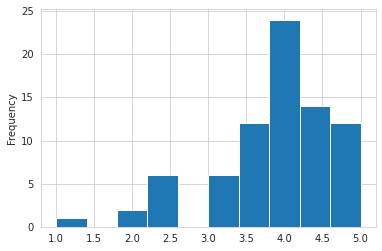

In [53]:
plot_filme(46578)

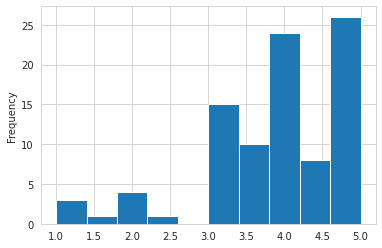

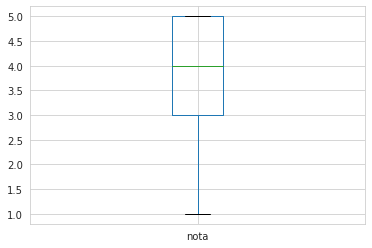

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [54]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(919)

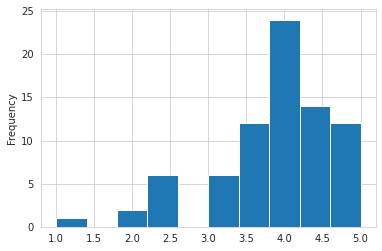

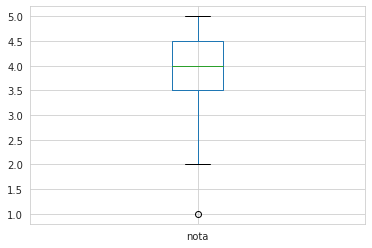

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [55]:
plot_filme(46578)

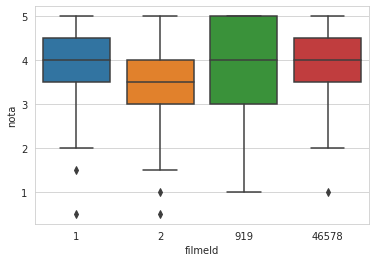

In [56]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

### Desafios

#### Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

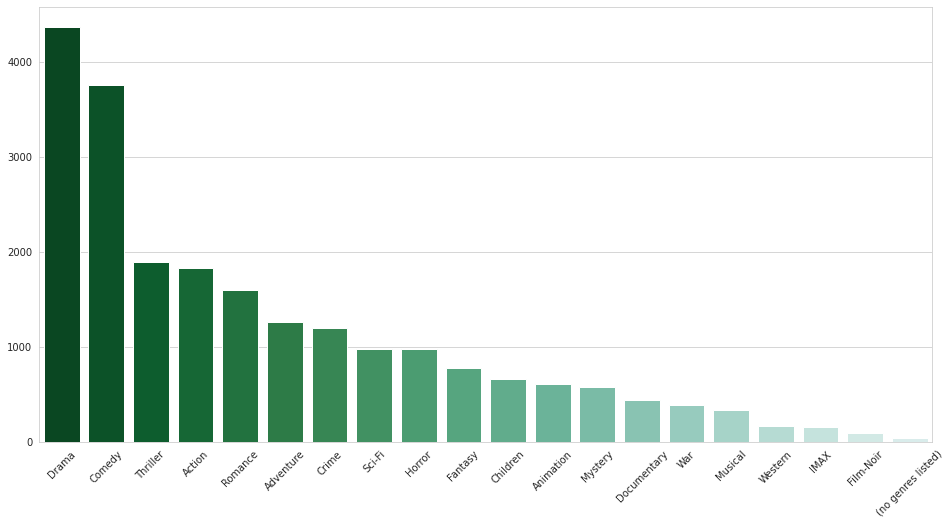

In [57]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
plt.xticks(rotation=45) #Rotação dos ticks em 45°
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

### Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [0]:
a = 5000;
b = 5100;
dados = filmes_com_media.sort_values("nota_media", ascending=False)[a:b]
dados = dados.sample(frac=0.2, replace=True, random_state=1) #seleciono 20% do dataframe aleatoriamente 
for x in dados["filmeId"]:
  plot_filme(x)

### Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
numero_de_votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
filmes_com_media_e_numero_de_votos = filmes_com_media.join(numero_de_votos_por_filme, on="filmeId")
filmes_com_media_e_numero_de_votos.rename(columns={'nota':'numero_de_votos'}, inplace=True)
filmes_com_media_e_numero_de_votos.sort_values("numero_de_votos",ascending=False)
Dez_filmes_mais_votados = filmes_com_media_e_numero_de_votos.sort_values("numero_de_votos",ascending=False).head(10)


In [90]:
Dez_filmes_mais_votados

,filmeId,titulo,generos,nota_media,numero_de_votos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0


In [152]:
titulos = filmes["titulo"]
titulos.index = filmes["filmeId"]
titulos

filmeId
1                                  Toy Story (1995)
2                                    Jumanji (1995)
3                           Grumpier Old Men (1995)
4                          Waiting to Exhale (1995)
5                Father of the Bride Part II (1995)
                            ...                    
193581    Black Butler: Book of the Atlantic (2017)
193583                 No Game No Life: Zero (2017)
193585                                 Flint (2017)
193587          Bungo Stray Dogs: Dead Apple (2018)
193609          Andrew Dice Clay: Dice Rules (1991)
Name: titulo, Length: 9742, dtype: object

In [0]:
avaliacoes_com_nome = avaliacoes.join(titulos, on="filmeId")

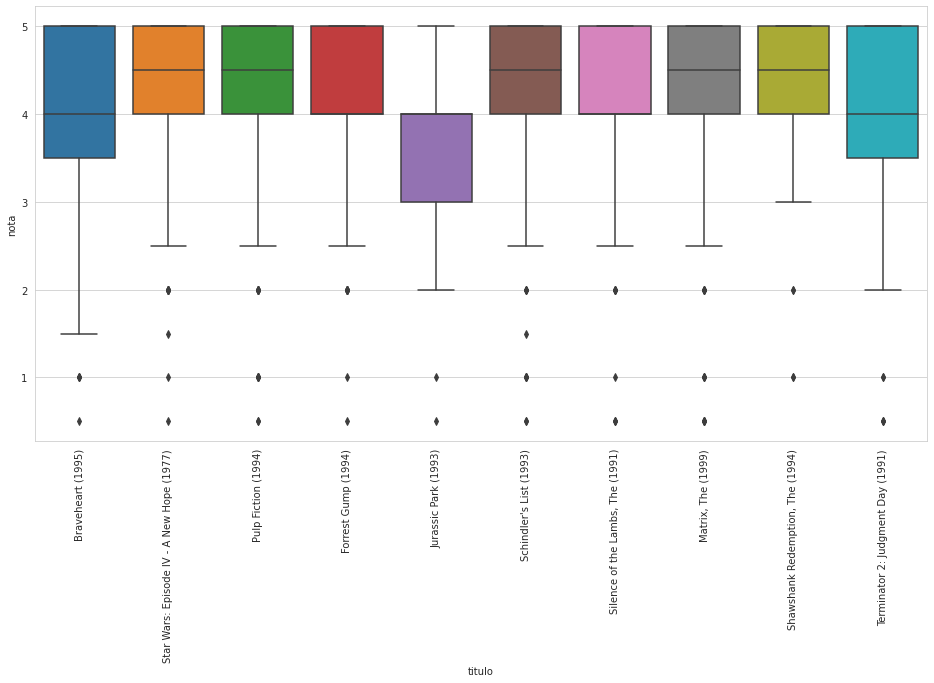

In [166]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(16,8))
plt.xticks(rotation=90) #Rotação dos ticks em 90°

ids = Dez_filmes_mais_votados["filmeId"].values.tolist()

sns.boxplot(data = avaliacoes_com_nome.query("filmeId in "+str(ids)), x ="titulo", y="nota")

plt.show()

### Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

Na verdade acabei fazendo o que é pedido nesse desafio no desafio anterior de numero 3 proposto por [Paulo Silveira](https://twitter.com/paulo_caelum), mas de qualquer forma:

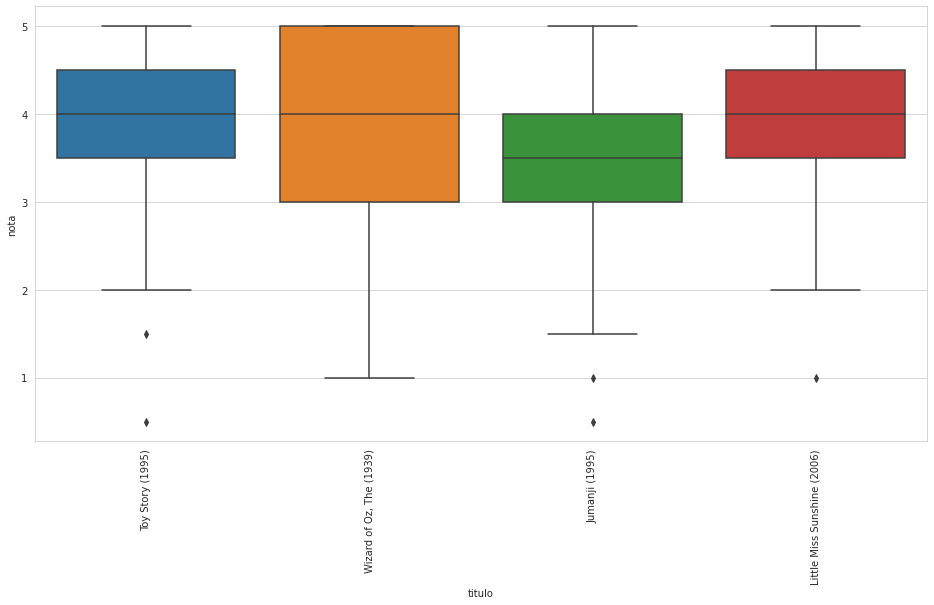

In [167]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(16,8))#Configurando o tamanho;
plt.xticks(rotation=90) #Rotação dos ticks em 90°;
# utilizando a variavel avaliacoes_com_nome criada no desafio anterior é possivel plotar os boxplot com nome dos filmes;
ids = Dez_filmes_mais_votados["filmeId"].values.tolist()

sns.boxplot(data = avaliacoes_com_nome.query("filmeId in [1,2,919,46578]"), x ="titulo", y="nota")
#os ajustes são feitos trocando o dataframe onde é feita a query de avaliacoes para avaliacoes_com_nome,
#e o valor de x que muda de "filmeId" para "titulo";
plt.show()

### Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

Explorando as notas:

In [0]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()

notas_modais_por_filme = avaliacoes.groupby("filmeId")["nota"].agg(pd.Series.mode)
notas_medianas_por_filme = avaliacoes.groupby("filmeId")["nota"].median()

notas_modais_por_filme.name = "Moda";
notas_medianas_por_filme.name = "Mediana";

filmes_com_media_numero_de_votos_moda = filmes_com_media_e_numero_de_votos.join(notas_modais_por_filme, on="filmeId")
filmes_com_media_numero_de_votos_moda_mediana = filmes_com_media_numero_de_votos_moda.join(notas_medianas_por_filme, on="filmeId")



In [236]:
filmes_com_media_0_5 = filmes_com_media_numero_de_votos_moda_mediana.query("nota_media == 0.5")
filmes_com_media_0_5

,filmeId,titulo,generos,nota_media,numero_de_votos,moda,mediana
2689,3604,Gypsy (1962),Musical,0.5,1.0,0.5,0.5
2933,3933,"Killer Shrews, The (1959)",Horror|Sci-Fi,0.5,1.0,0.5,0.5
3027,4051,Horrors of Spider Island (Ein Toter Hing im Ne...,Horror|Sci-Fi,0.5,1.0,0.5,0.5
3235,4371,Baby Boy (2001),Crime|Drama,0.5,1.0,0.5,0.5
3369,4580,Cyborg (1989),Action|Sci-Fi,0.5,2.0,0.5,0.5
...,...,...,...,...,...,...,...
9419,165645,Bad Santa 2 (2016),Comedy,0.5,1.0,0.5,0.5
9444,167296,Iron Man (1931),Drama,0.5,1.0,0.5,0.5
9558,173307,The Gracefield Incident (2015),Action|Horror|Sci-Fi,0.5,1.0,0.5,0.5
9590,175475,The Emoji Movie (2017),Animation|Children|Comedy,0.5,1.0,0.5,0.5


In [237]:
filmes_com_media_3 = filmes_com_media_numero_de_votos_moda_mediana.query("nota_media == 3")
filmes_com_media_3

,filmeId,titulo,generos,nota_media,numero_de_votos,moda,mediana
14,15,Cutthroat Island (1995),Action|Adventure|Romance,3.0,13.0,4,3.0
29,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama,3.0,3.0,4,4.0
38,42,Dead Presidents (1995),Action|Crime|Drama,3.0,7.0,3,3.0
45,49,When Night Is Falling (1995),Drama|Romance,3.0,1.0,3,3.0
75,83,Once Upon a Time... When We Were Colored (1995),Drama|Romance,3.0,1.0,3,3.0
...,...,...,...,...,...,...,...
9704,185473,Blockers (2018),Comedy,3.0,1.0,3,3.0
9706,186587,Rampage (2018),Action|Adventure|Sci-Fi,3.0,1.0,3,3.0
9708,187541,Incredibles 2 (2018),Action|Adventure|Animation|Children,3.0,4.0,4,3.5
9719,189111,Spiral (2018),Documentary,3.0,1.0,3,3.0


In [238]:
filmes_com_media_5 = filmes_com_media_numero_de_votos_moda_mediana.query("nota_media == 5")
filmes_com_media_5

,filmeId,titulo,generos,nota_media,numero_de_votos,moda,mediana
48,53,Lamerica (1994),Adventure|Drama,5.0,2.0,5,5.0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,5.0,2.0,5,5.0
121,148,"Awfully Big Adventure, An (1995)",Drama,5.0,1.0,5,5.0
405,467,Live Nude Girls (1995),Comedy,5.0,1.0,5,5.0
432,495,In the Realm of the Senses (Ai no corrida) (1976),Drama,5.0,1.0,5,5.0
...,...,...,...,...,...,...,...
9611,176601,Black Mirror,(no genres listed),5.0,1.0,5,5.0
9633,179133,Loving Vincent (2017),Animation|Crime|Drama,5.0,1.0,5,5.0
9634,179135,Blue Planet II (2017),Documentary,5.0,1.0,5,5.0
9688,184245,De platte jungle (1978),Documentary,5.0,1.0,5,5.0


É possivel concluir que existe um numero maior de filmes com media 3, do que 0.5 e 5.

### Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

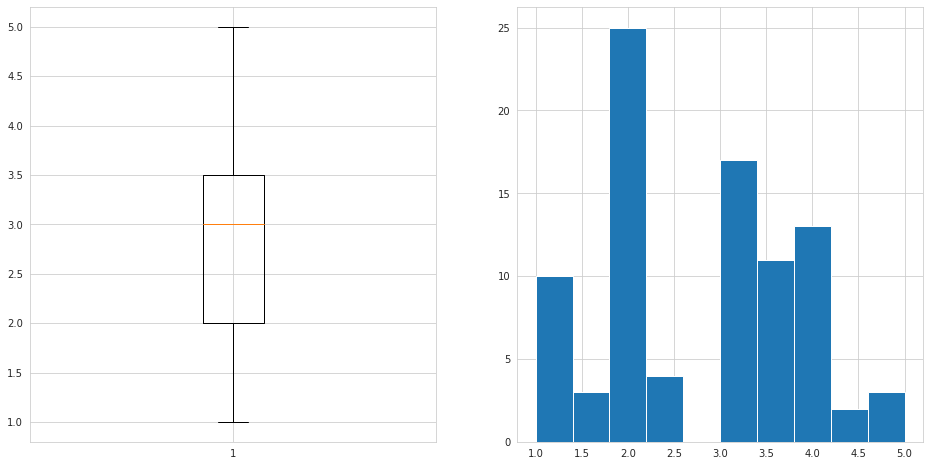

In [194]:
x = 19;
notas_do_filme = avaliacoes.query("filmeId=="+str(x))["nota"]

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16,8))
axes[0].boxplot(notas_do_filme) 
axes[1].hist(notas_do_filme)
plt.show()
  

### Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [0]:

filmes_com_ano = filmes_com_media_numero_de_votos_moda_mediana[filmes_com_media_numero_de_votos_moda_mediana["titulo"].str.endswith(")")]

In [0]:
anos = filmes_com_ano["titulo"].str[-5:-1] 
anos.name = "ano"
anos.index = filmes_com_ano["filmeId"]

In [307]:
filmes_com_ano = filmes_com_media_numero_de_votos_moda_mediana.join(anos, on="filmeId")
filmes_com_ano

,filmeId,titulo,generos,nota_media,numero_de_votos,moda,mediana,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,4,4.0,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0,4,3.5,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,3,3.0,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0,3,3.0,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0,3,3.0,1995
...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1.0,4,4.0,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1.0,3.5,3.5,2017
9739,193585,Flint (2017),Drama,3.500000,1.0,3.5,3.5,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1.0,3.5,3.5,2018


In [0]:
plotar_por_ano = filmes_com_ano.groupby("ano")["nota_media"].mean()

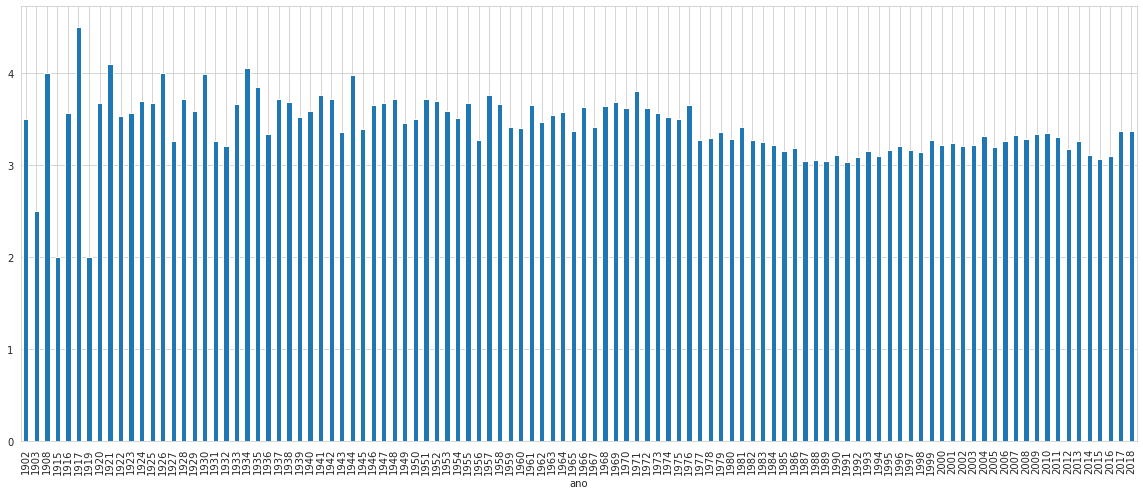

In [321]:
plt.figure(figsize=(20,8))
plotar_por_ano.plot(kind = "bar")

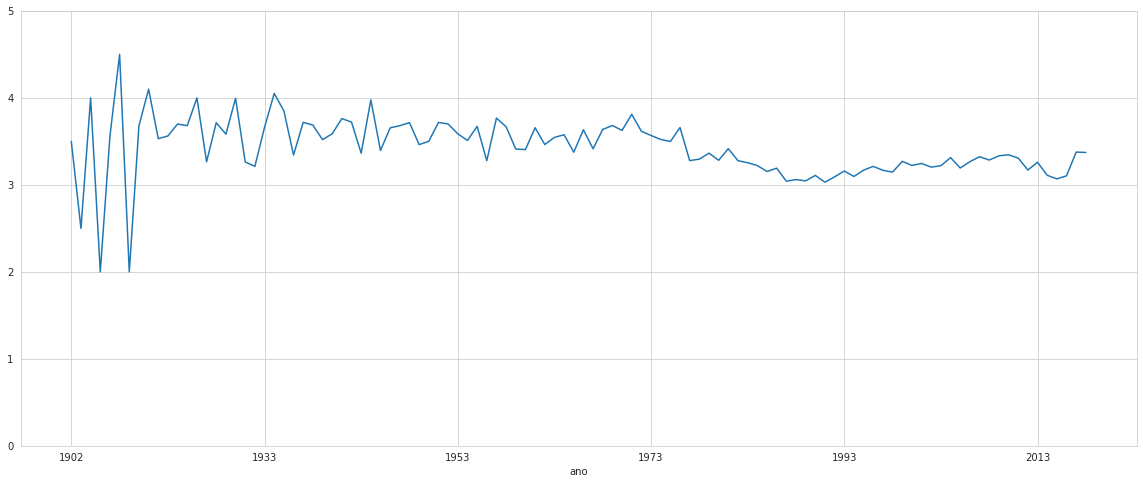

In [320]:
plt.figure(figsize=(20,8))
plt.ylim(0,5)
#plt.xlim(1900,2020)
plotar_por_ano.plot()